In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import PIL

In [2]:
from architecture import * 
face_encoder = InceptionResNetV2()
path = "facenet_keras_weights.h5"
face_encoder.load_weights(path)


In [3]:
print(face_encoder.inputs)
print(face_encoder.outputs)


[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [4]:
def img_to_encoding(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

In [5]:
import cv2

achintya=cv2.imread("images/achintya_1.jpeg")
arnav=cv2.imread("images/arnav_1.jpeg")
ashutosh=cv2.imread("images/ashutosh_1.jpeg")

In [6]:
achintya=cv2.cvtColor(achintya,cv2.COLOR_BGR2RGB)
ashutosh=cv2.cvtColor(ashutosh,cv2.COLOR_BGR2RGB)
arnav=cv2.cvtColor(arnav,cv2.COLOR_BGR2RGB)


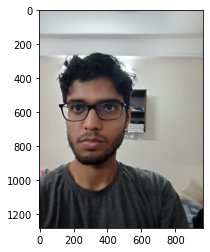

In [7]:
import matplotlib.pyplot as plt
plt.imshow(achintya)



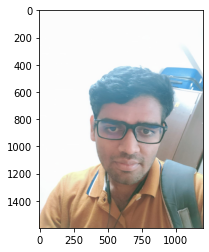

In [11]:
plt.imshow(ashutosh)

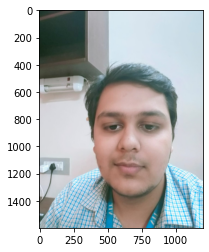

In [12]:
plt.imshow(arnav)

In [8]:
database={}
database["Achintya"]=img_to_encoding("images/achintya_1.jpeg", face_encoder)
database["Ashutosh"]=img_to_encoding("images/ashutosh_1.jpeg",face_encoder)
database["Arnav"]=img_to_encoding("images/arnav_1.jpeg",face_encoder)



In [9]:
print(database["Achintya"])

[[ 0.00479785 -0.08334405 -0.07311058 -0.12503427  0.0640078  -0.00936696
  -0.05477244 -0.07275413  0.01871933 -0.07635933  0.12693377 -0.06862033
  -0.07877986 -0.11586217 -0.00680387  0.04126508  0.08290084 -0.02994296
   0.04497423 -0.1604038  -0.06790438 -0.02617397 -0.14505921 -0.01153397
   0.05805892  0.0137904   0.05004951  0.15356278 -0.07927308  0.08864244
   0.01046717  0.12625322 -0.06547916 -0.0627229   0.0665326   0.01391546
  -0.04589957  0.1662202   0.21194188  0.08939949  0.04245971  0.01833371
   0.03153381 -0.05232019 -0.107976   -0.08763444  0.00396208 -0.04676342
   0.01874795  0.07162231  0.00178553  0.13375553  0.1790047  -0.09289299
   0.06246093  0.12977631 -0.03741342 -0.03392282 -0.0585267  -0.12909143
  -0.03955137 -0.09870879 -0.01014869  0.11754908  0.05679127  0.11495838
   0.01048697  0.01689808 -0.00143034 -0.04116402  0.0405033  -0.11345746
   0.06437578 -0.21754137 -0.06841636  0.05008309 -0.05103205  0.11733146
  -0.13295546 -0.07242881 -0.02261924 

In [10]:
def who_is_it(image_path, database, model):
    encoding =  img_to_encoding(image_path,model)

    min_dist = 100
    
    for (name, db_enc) in database.items():
        
        
        dist = np.linalg.norm(encoding-db_enc)

        if dist<min_dist:
            min_dist = dist
            identity = name
    if min_dist > 0.8:
        print("ENTRY DENIED!!! WE CANT FIND YOU IN OUR SYSTEM.")
    else:
        print ("it's " + str(identity) + ", Welcome in !!!")
        
    return min_dist, identity

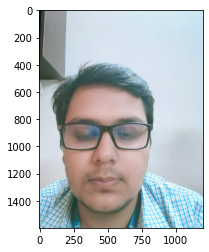

In [13]:
#test image
arnav_test=cv2.imread("images/arnav_2.jpeg")
arnav_test=cv2.cvtColor(arnav_test,cv2.COLOR_BGR2RGB)
plt.imshow(arnav_test)

In [14]:
#TESTING THE DATABSE WITH NEW IMAGES
who_is_it("images/arnav_2.jpeg", database,face_encoder)

it's Arnav, Welcome in !!!


(0.7784942, 'Arnav')